In [138]:
import time
import numpy as np

from matplotlib import pyplot as plt
from collections import Counter
from tqdm import tqdm
from jamo import hangul_to_jamo

from multiprocessing import Pool
from itertools import repeat



plt.rcParams['font.family'] = 'NanumGothic'

# Paths

In [5]:
test_data_path = './test_data'

train_data_path = './train_data'
train_label_path = './train_label'

valid_data_path = './valid_data'
valid_label_path = './valid_label'

# Data (text)

- Phoneme 종류 및 count
- Char 종류 및 count

In [36]:
def load_data(path):
    with open(path, 'r') as f:
            data = f.readlines()
            
    return [x.strip() for x in data]

# for multiprocessing
def split_data(n, data):
    return [data[i:i + int(len(data) / n) + 1] for i in range(0, len(data), int(len(data) / n) + 1)]


# sentence to char
def to_jamo(data, use_counter=False):
    if use_counter:
        analysis_result = Counter()
    else:
        analysis_result = set()
    
    for x in tqdm(data):
        analysis_result.update(hangul_to_jamo(x))
        
    return analysis_result

def text_to_char(data, n=16, use_counter=False):
    splited_data = split_data(n,data)
    
    with Pool(n) as p:
        results = p.starmap(to_jamo, zip(splited_data, repeat(use_counter)))

    if use_counter:
        return sum(results, Counter())
    else:
        return set(set.union(*results))

def draw_hist(counted_data, s_idx=0, e_idx=100, vline_y=None):
    plt.figure(figsize=(15, 3))
    plt.plot([x[1] for x in counted_data.most_common()][s_idx:e_idx])
    plt.xticks(range(e_idx-s_idx), [x[0] for x in counted_data.most_common()][s_idx:e_idx])
    
    if vline_y:
        plt.axvline(x=vline_y, color='r', linewidth=1)
    
    plt.show()

In [22]:
train_data = load_data(train_data_path)
valid_data = load_data(valid_data_path)
test_data = load_data(test_data_path)

In [16]:
print(train_data[:3])

['배경음 love theme의 감동적인 선율과 영사기에서 나오는 달콤한 키스 장면들을 보며 토토의 회상에 젖은듯한 애잔한 표정 지금도 잊을수가 없다.', '불멸의 명작. 영화인을 꿈꾸는 사람이라면 반드시 봐야할 영화', '탄탄한 스토리와 거장 엔니오 모리꼬네가 만들어낸 최고의 영화. 몇번을 봐도 마지막장면에선 항상 토토와 함께 눈물을 흘린다. 우정, 사랑, 추억이 어우러져 가슴을 절로 아련하게 만든다. 숨은 이야기가 담긴 감독판으로 재상영 했으면 하는 바람이..']


phoneme

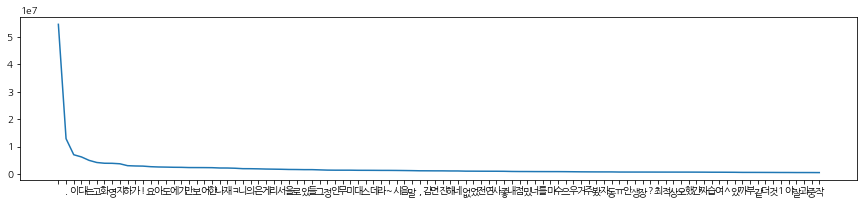

In [10]:
phoneme_counter = Counter()

for x in train_data:
    phoneme_counter.update(list(x))
    
plt.figure(figsize=(15, 3))
plt.plot([x[1] for x in phoneme_counter.most_common()][:100])
plt.xticks(range(len(phoneme_counter))[:100], [x[0] for x in phoneme_counter.most_common()][:100], )
plt.show()

In [14]:
print(char_counter.most_common()[:50])

[(' ', 54627506), ('.', 12910930), ('이', 7052368), ('다', 6252271), ('는', 4996134), ('고', 4221539), ('화', 3948331), ('영', 3922076), ('지', 3750771), ('하', 3062680), ('가', 2952665), ('!', 2903057), ('요', 2691938), ('아', 2585186), ('도', 2538379), ('에', 2476184), ('기', 2453786), ('만', 2372133), ('보', 2364775), ('어', 2355695), ('한', 2329302), ('나', 2216008), ('재', 2206124), ('ㅋ', 2123025), ('니', 1967048), ('의', 1954202), ('은', 1905219), ('게', 1830128), ('리', 1788252), ('서', 1746053), ('을', 1677867), ('로', 1657217), ('있', 1615807), ('들', 1615523), ('그', 1528221), ('정', 1442170), ('인', 1415972), ('무', 1414553), ('미', 1413447), ('대', 1375294), ('스', 1369465), ('데', 1358930), ('라', 1340158), ('~', 1338240), ('시', 1317098), ('음', 1285991), ('말', 1251365), (',', 1198279), ('감', 1189355), ('면', 1172917)]


character

In [20]:
num_workers = 16

In [39]:
counted_char_valid_data = text_to_char(valid_data, n=num_workers, use_counter=True)

100%|██████████| 610/610 [00:00<00:00, 22024.17it/s]

100%|██████████| 626/626 [00:00<00:00, 14226.30it/s]

100%|██████████| 626/626 [00:00<00:00, 14233.39it/s]

100%|██████████| 626/626 [00:00<00:00, 12135.15it/s]

100%|██████████| 626/626 [00:00<00:00, 14174.46it/s]



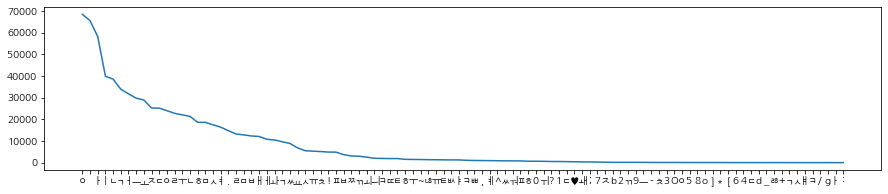

In [40]:
# valid
draw_hist(counted_char_valid_data)

In [37]:
counted_char_train_data = text_to_char(train_data, n=num_workers, use_counter=True)

100%|██████████| 562485/562485 [00:28<00:00, 19874.95it/s]


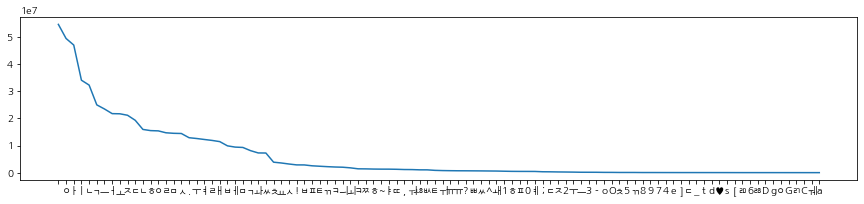

In [38]:
# train_data

draw_hist(counted_char_train_data)

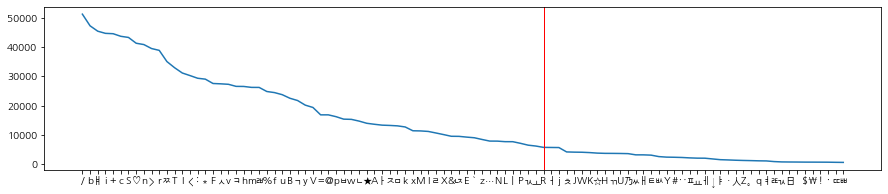

In [50]:
# 160
draw_hist(counted_char_train_data, s_idx=100, e_idx=200, vline_y=60)

length

In [58]:
len_train_data = [len(x) for x in train_data]
len_valid_data = [len(x) for x in valid_data]
len_test_data = [len(x) for x in test_data]

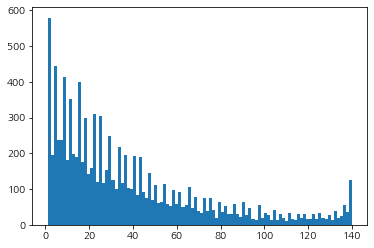

In [62]:
plt.hist(len_valid_data, bins=100)
plt.show()

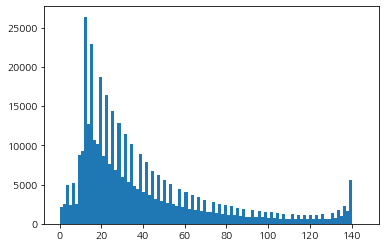

In [63]:
plt.hist(len_test_data, bins=100)
plt.show()

# Data (label)

In [161]:
valid_label = load_data(valid_label_path)

In [42]:
train_label = load_data(train_label_path)

counted_train_label = Counter(train_label)

In [48]:
print(counted_train_label)

Counter({'10': 4597069, '9': 982114, '1': 919251, '8': 868355, '7': 538344, '6': 367265, '5': 281436, '4': 164124, '3': 143429, '2': 138613})


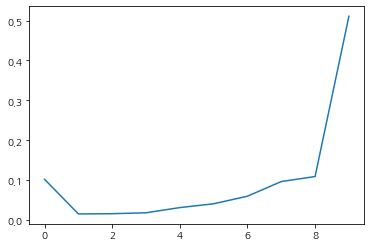

In [51]:
plt.plot([counted_train_label[str(x)]/sum(counted_train_label.values()) for x in range(1, 11)])
plt.show()

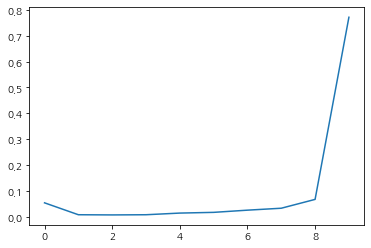

In [165]:
counted_valid_label = Counter(valid_label)

plt.plot([counted_valid_label[str(x)]/sum(counted_valid_label.values()) for x in range(1, 11)])
plt.show()

In [167]:
counted_valid_label

Counter({'9': 666,
         '10': 7719,
         '8': 324,
         '6': 164,
         '7': 249,
         '3': 65,
         '1': 533,
         '2': 72,
         '5': 136,
         '4': 72})

In [166]:
[counted_valid_label[str(x)]/sum(counted_valid_label.values()) for x in range(1, 11)]

[0.0533,
 0.0072,
 0.0065,
 0.0072,
 0.0136,
 0.0164,
 0.0249,
 0.0324,
 0.0666,
 0.7719]

# data filtering

In [156]:
filtered_data = []
filtered_label = []

for i, length in enumerate(len_train_data):
    if length > 0 and length < 100:
        filtered_data.append(train_data[i])
        filtered_label.append(train_label[i])

In [73]:
len_train_data[:10]

[82, 33, 136, 33, 34, 119, 50, 136, 17, 108]

In [158]:
print(filtered_data[:10])
print(filtered_data[:10])

['배경음 love theme의 감동적인 선율과 영사기에서 나오는 달콤한 키스 장면들을 보며 토토의 회상에 젖은듯한 애잔한 표정 지금도 잊을수가 없다.', '불멸의 명작. 영화인을 꿈꾸는 사람이라면 반드시 봐야할 영화', '20년이 훨씬 지났지만 아직도 생각하면 가슴이 벅차네요...', '오랜만에 다시 보아도 너무 예쁘고 사랑스런 눈물나게 하는 영화', '아 근데 재개봉 버전 뭐이렇게 삭제된 장면이 많냐;; 후반 엘레나 시퀀스는 통째로 삭제됐네', '삶의 모든 것이 들어있었다 ㅠㅠ', '신촌cgv에서 예전시네마천국  기대했는데   너무영화가  뚝뚝 끊어지냉 ㄴ누가  편집했는지  몰라도   영화  망쳐났냉   너무티나게  짤랐냉    ...', '살바토레와 알프레도의 케미는 가히 역대급이다... 명작의 가치는 역시 시대를 초월한다', '아주  먼  훗날, 이제  더는  흘릴  눈물이 남아 있을 것 같지  않을 그 날에도 조용히 마른 가슴을 적셔줄 영화...', 'ost만 들어도 눈물나는 영화']
['10', '9', '10', '10', '10', '10', '6', '9', '10', '10']


In [94]:
list(range(0,140,10))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]

In [157]:
with open('filtered_train_data', 'w') as f:
    f.writelines('\n'.join(filtered_data))
    
with open('filtered_train_label', 'w') as f:
    f.writelines('\n'.join(filtered_label))

In [162]:
filtered_data = []
filtered_label = []

for i, length in enumerate(len_valid_data):
    if length > 0:
        filtered_data.append(valid_data[i])
        filtered_label.append(valid_label[i])
        
with open('filtered_valid_data', 'w') as f:
    f.writelines('\n'.join(filtered_data))
    
with open('filtered_valid_label', 'w') as f:
    f.writelines('\n'.join(filtered_label))

# lenght analysis

In [124]:
sorted_len_and_label = sorted(zip(len_train_data, [int(x) for x in train_label]))

In [125]:
sorted_len_and_label[0]

(0, 1)

In [126]:
sorted_len_and_label.index((10, 1))

742690

In [129]:
sorted_len_and_label[742690]

(10, 1)

In [139]:
tmp = []

for x in range(0,140,10):
    for i in range(1, 11):
        if (x, i) in sorted_len_and_label:
            s_idx = sorted_len_and_label.index((x, i))
            break
    
    for i in range(1, 11):
        if (x+10, i) in sorted_len_and_label:
            e_idx = sorted_len_and_label.index((x+10, i))-1
            break
            
    tmp.append(Counter([label for length, label in sorted_len_and_label[s_idx:e_idx+1]]))

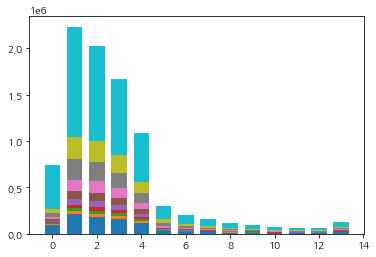

In [146]:
prev = np.asarray([0]*14)
for j in range(1, 11):
    plt.bar(range(14), [tmp[i][j] for i in range(len(tmp))], 0.7, bottom=prev)
    prev = prev + np.asarray([tmp[i][j] for i in range(len(tmp))])

742690

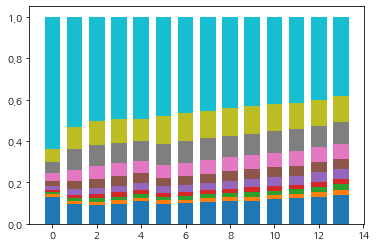

In [152]:
# scaled

prev = np.asarray([0]*14)
for j in range(1, 11):
    plt.bar(range(14), [tmp[i][j]/sum(tmp[i].values()) for i in range(len(tmp))], 0.7, bottom=prev)
    prev = prev + np.asarray([tmp[i][j]/sum(tmp[i].values()) for i in range(len(tmp))])

sum(tmp[0].values())

In [153]:
f_label = []

for i, length in enumerate(len_train_data):
    if length == 0:
        f_label.append(train_label[i])

(array([ 44., 193.,   0.,  18.,   0.,   7.,  13.,   0.,   2.,   5.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

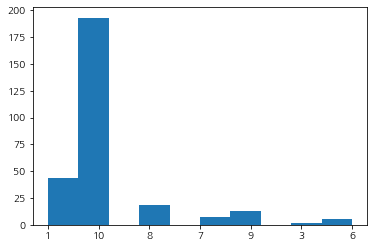

In [154]:
plt.hist(f_label)

(array([13567., 92173.,  7412., 17798., 12445.,  1878.,  3854.,  4721.,
         2164.,  1854.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

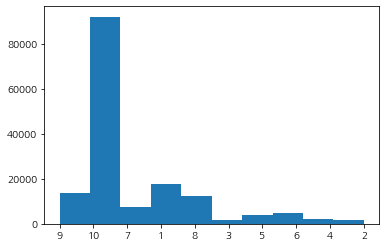

In [155]:
f_label = []

for i, length in enumerate(len_train_data):
    if length == 10:
        f_label.append(train_label[i])
plt.hist(f_label)